# Portfolio Analysis Problem Set: Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('2000_data.csv', index_col=0)
securities = df.loc[:, 'Agric':'Other']
market = df.loc[:, 'SP500']
interest = df.loc[:, 'LIBOR']

## Part (a)

In [3]:
mu = securities.mean()
cov = securities.cov()

## Part (b)

In [4]:
# Naive portfolio
naive = securities.mean(axis=1)
mu_naive = naive.mean()
sigma_naive = naive.std()

In [5]:
# Market portfolio
mu_market = market.mean()
sigma_market = market.std()

In [6]:
# Minimum variance portfolio
sigma_mvp = 1 / np.linalg.inv(cov).sum()
weights_mvp = sigma_mvp**2 * np.linalg.inv(cov) @ np.ones(cov.shape[0])
mu_mvp = mu @ weights_mvp

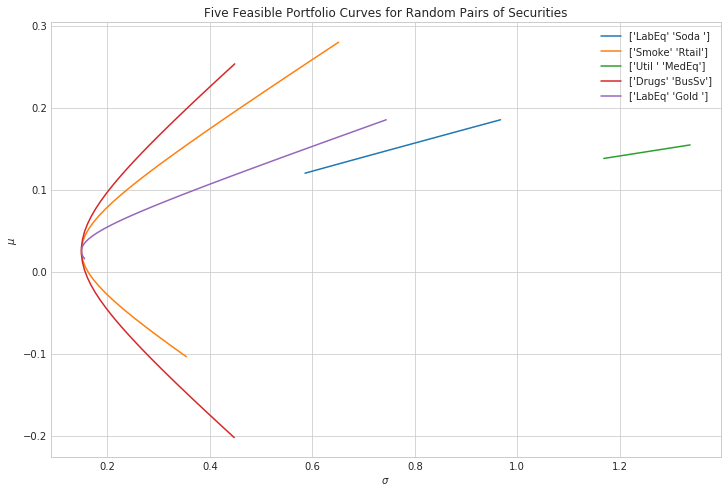

In [7]:
# Plot feasible portfolio curves for 5 random pairs of securities
mu_list = []
sigma_list = []
choices_list = []
for _ in range(5):
    choices = np.random.choice(securities.columns, 2, replace=False)

    mus = securities[choices].mean()
    sigmas = securities[choices].std()
    rho, _ = stats.pearsonr(securities[choices[0]], securities[choices[1]])
    A_sq = np.sqrt((sigmas[0]**2 + sigmas[1]**2 - 2*rho*sigmas[0]*sigmas[1]) / (mus[0] - mus[1]) ** 2)
    
    mu_v = np.linspace(mus.min(), mus.max())
    sigma_v = np.sqrt(sigma_mvp**2 + A_sq * (mu_v - mu_mvp)**2)

    mu_list.append(mu_v)
    sigma_list.append(sigma_v)
    choices_list.append(str(choices))

plt.figure(figsize=[12, 8])
for mu_v, sigma_v in zip(mu_list, sigma_list):
    plt.plot(sigma_v, mu_v)

plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.title('Five Feasible Portfolio Curves for Random Pairs of Securities')
plt.legend(choices_list);

## Part (c)

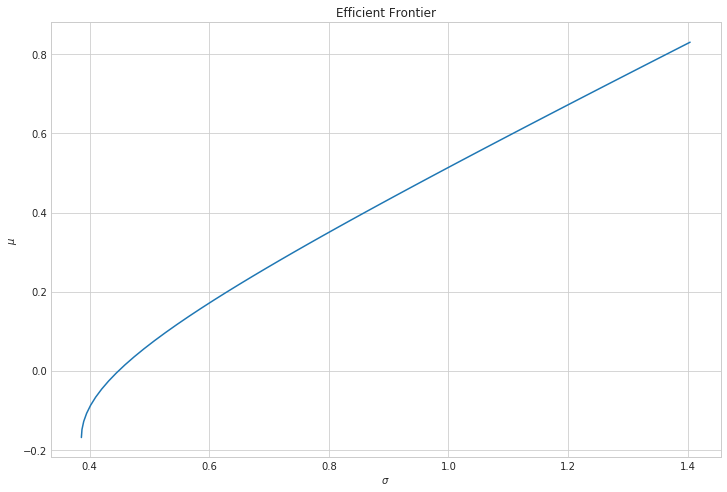

In [49]:
# Compute and graph efficient frontier
m_tilde = np.vstack([mu, np.ones(mu.shape)]).T
B = m_tilde.T @ np.linalg.inv(cov) @ m_tilde
G = np.linalg.inv(B) @ m_tilde.T @ np.linalg.inv(cov) @ m_tilde @ np.linalg.inv(B)
a, d, _, b = G.flatten()

mu_mvp = d / a
sigma_mvp = np.sqrt(np.linalg.det(G) / a)

mu_v = np.linspace(mu_mvp, mu_mvp + 1)  # A bit of kludge here...
sigma_v = np.sqrt(a*(mu_v - d/a)**2 + (1/a)*np.linalg.det(G))

plt.figure(figsize=[12, 8])
plt.plot(sigma_v, mu_v)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.title('Efficient Frontier');

In [14]:
R = interest.mean()

if R > mu_mvp:
    raise Exception('R is greater than mu_mvp')

Exception: R is greater than mu_mvp

## Part (d)

In [44]:
choices = np.random.choice(mu_v.shape[0], 3, replace=False)

In [45]:
mu_v[choices]

array([ 0.63265306,  0.75510204,  0.2244898 ])

In [46]:
sigma_v[choices]

array([ 1.14936429,  1.3062509 ,  0.65698634])

## Part (e)

In [60]:
R = interest.mean()

msg = 'R < mu_mvp' if R < mu_mvp else 'R is not < mu_mvp!'
print(msg)

R is not < mu_mvp!
